In [39]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

In [40]:
df_BTC = pd.read_csv('final_BTCUSDT.csv')

In [41]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,2.244919e+07,0,1640991600000,1640995199999,BTC,USDT
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,2.077702e+07,0,1640988000000,1640991599999,BTC,USDT
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,4.482430e+07,0,1640984400000,1640987999999,BTC,USDT
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,4.588270e+07,0,1640980800000,1640984399999,BTC,USDT
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,7.803749e+07,0,1640977200000,1640980799999,BTC,USDT


In [42]:
df_BTC = df_BTC.sort_values(by=['open_timestamp']).reset_index(drop=True)

In [43]:
df_BTC['datetime'] = df_BTC['open_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [44]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())

In [47]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,ignore,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week
0,"01/01/2021, 00:00:00","01/01/2021, 00:59:59",28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389,1215.359238,...,0,1609459200000,1609462799999,BTC,USDT,2021-01-01 00:00:00,2021,1,1,4
1,"01/01/2021, 01:00:00","01/01/2021, 01:59:59",28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896,3160.041701,...,0,1609462800000,1609466399999,BTC,USDT,2021-01-01 01:00:00,2021,1,1,4
2,"01/01/2021, 02:00:00","01/01/2021, 02:59:59",29410.00,29465.26,29120.03,29194.65,2384.231560,6.984265e+07,57646,1203.433506,...,0,1609466400000,1609469999999,BTC,USDT,2021-01-01 02:00:00,2021,1,1,4
3,"01/01/2021, 03:00:00","01/01/2021, 03:59:59",29195.25,29367.00,29150.02,29278.40,1461.345077,4.276078e+07,42510,775.915666,...,0,1609470000000,1609473599999,BTC,USDT,2021-01-01 03:00:00,2021,1,1,4
4,"01/01/2021, 04:00:00","01/01/2021, 04:59:59",29278.41,29395.00,29029.40,29220.31,2038.046803,5.961464e+07,55414,1003.342834,...,0,1609473600000,1609477199999,BTC,USDT,2021-01-01 04:00:00,2021,1,1,4


In [48]:
df_BTC.tail()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,ignore,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week
21269,"06/06/2023, 19:00:00","06/06/2023, 19:59:59",26698.08,27216.89,26690.93,27080.13,6336.18815,1.708337e+08,104285,3408.48655,...,0,1686078000000,1686081599999,BTC,USDT,2023-06-06 19:00:00,2023,6,6,1
21270,"06/06/2023, 20:00:00","06/06/2023, 20:59:59",27080.12,27222.00,26857.92,26944.98,5242.13695,1.416812e+08,94525,2348.15346,...,0,1686081600000,1686085199999,BTC,USDT,2023-06-06 20:00:00,2023,6,6,1
21271,"06/06/2023, 21:00:00","06/06/2023, 21:59:59",26944.99,27092.82,26938.06,27057.03,2014.79907,5.443146e+07,47340,1045.52643,...,0,1686085200000,1686088799999,BTC,USDT,2023-06-06 21:00:00,2023,6,6,1
21272,"06/06/2023, 22:00:00","06/06/2023, 22:59:59",27057.03,27188.46,27044.34,27152.65,1842.84082,4.994595e+07,36436,1033.99211,...,0,1686088800000,1686092399999,BTC,USDT,2023-06-06 22:00:00,2023,6,6,1
21273,"06/06/2023, 23:00:00","06/06/2023, 23:59:59",27152.66,27355.33,27120.02,27230.08,3752.27128,1.021350e+08,63295,2117.53706,...,0,1686092400000,1686095999999,BTC,USDT,2023-06-06 23:00:00,2023,6,6,1


In [49]:
df_BTC = df_BTC.sort_values('datetime', ascending = True)

In [50]:
df_BTC['change_open'] = - (df_BTC['open'].shift(1) - df_BTC['open'])

In [51]:
df_BTC = df_BTC.drop('ignore', axis =1)

In [52]:
corr_matrix = df_BTC.corr()

In [53]:
# sn.heatmap(corr_matrix, annot=True)
# plt.show()

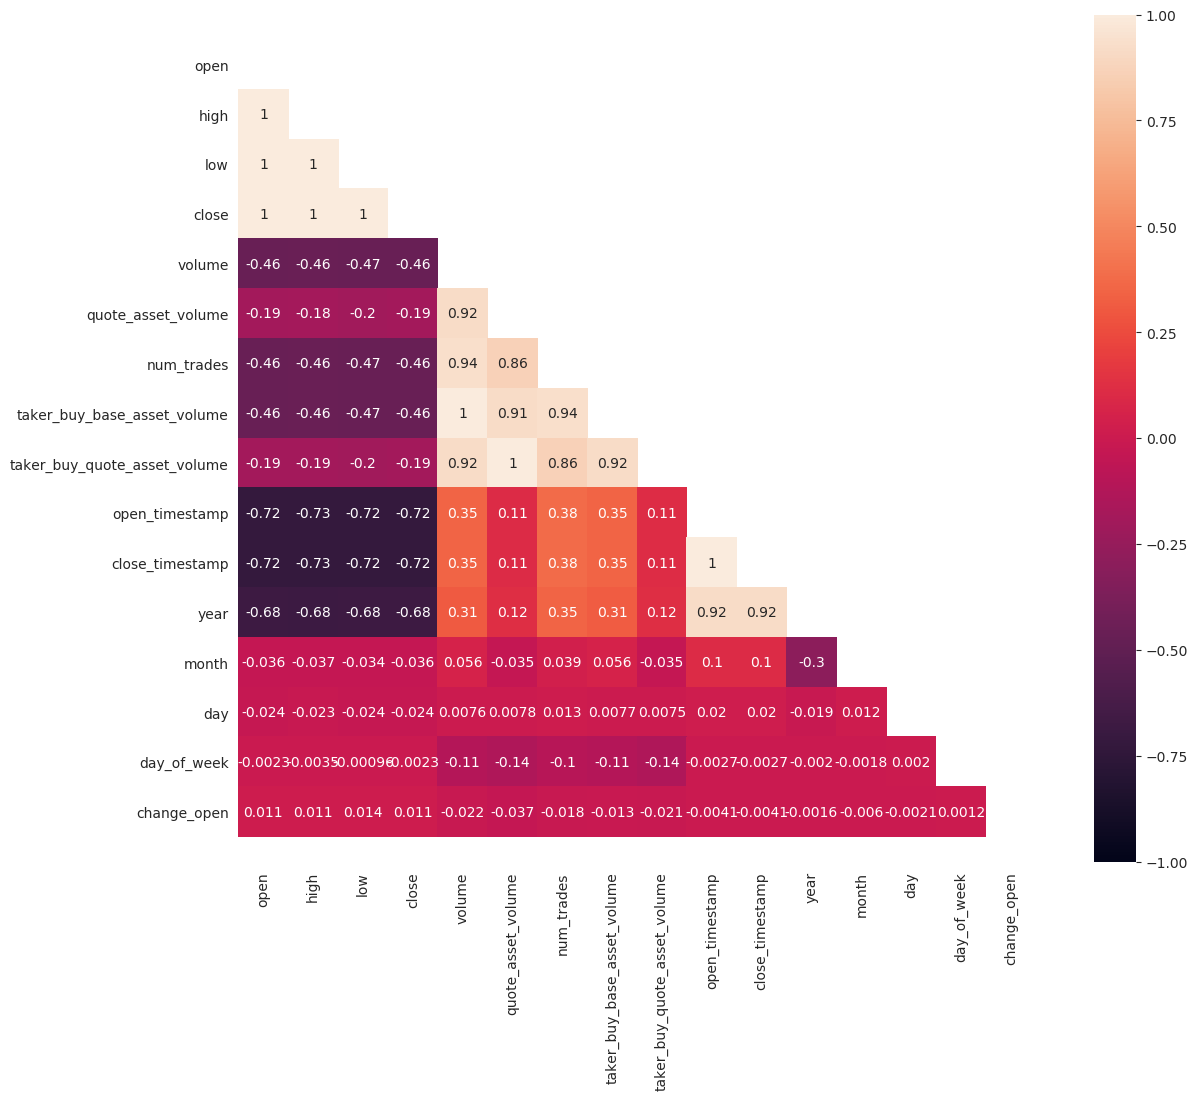

In [55]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 11))
    ax = sn.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

In [56]:
df_BTC_agg = pd.pivot_table(df_BTC, index=df_BTC.datetime.dt.week, columns=df_BTC.datetime.dt.year,
                    values='open', aggfunc='mean')

df_BTC_agg.head()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


datetime,2021,2022,2023
datetime,,,
1,36654.806071,43992.068690,16819.790357
2,36045.788929,42761.113571,18707.264881
3,33917.663333,39750.659226,21591.473512
4,32971.336964,36878.642202,22995.816548
5,36889.211786,38937.399583,23327.313452


In [57]:
df_BTC_agg1to6 = df_BTC_agg[df_BTC_agg.index <22]
df_BTC_agg1to6

datetime,2021,2022,2023
datetime,,,
1,36654.806071,43992.068690,16819.790357
2,36045.788929,42761.113571,18707.264881
3,33917.663333,39750.659226,21591.473512
4,32971.336964,36878.642202,22995.816548
5,36889.211786,38937.399583,23327.313452
6,46113.208024,43293.901012,22413.938512
7,52227.444583,41710.902321,23439.633393
8,48863.646131,38137.416964,23924.535357
9,48848.399760,41329.750000,23004.518095


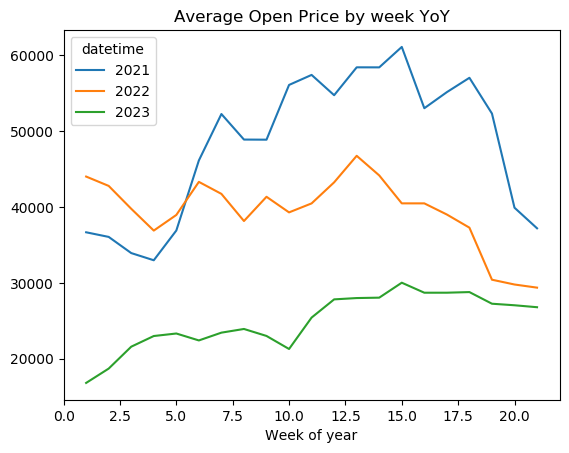

In [58]:
df_BTC_agg1to6.plot(title='Average Open Price by week YoY', xlabel='Week of year')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


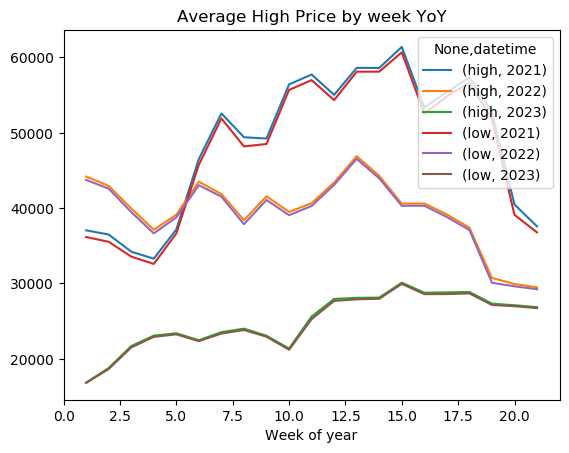

In [59]:
df_BTC_close_agg = pd.pivot_table(df_BTC, index=df_BTC.datetime.dt.week, columns=df_BTC.datetime.dt.year,
                    values=['high','low'], aggfunc='mean')

df_BTC_closeagg_1to6 = df_BTC_close_agg[df_BTC_close_agg.index <22]
df_BTC_closeagg_1to6 


df_BTC_closeagg_1to6.plot(title='Average High Price by week YoY', xlabel='Week of year')
plt.show()


In [60]:
df_BTC_vol_1to6 = pd.pivot_table(df_BTC, index=df_BTC.datetime.dt.week, columns=df_BTC.datetime.dt.year,
                    values='volume', aggfunc='mean')

df_BTC_agg.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


datetime,2021,2022,2023
datetime,,,
1,36654.806071,43992.068690,16819.790357
2,36045.788929,42761.113571,18707.264881
3,33917.663333,39750.659226,21591.473512
4,32971.336964,36878.642202,22995.816548
5,36889.211786,38937.399583,23327.313452


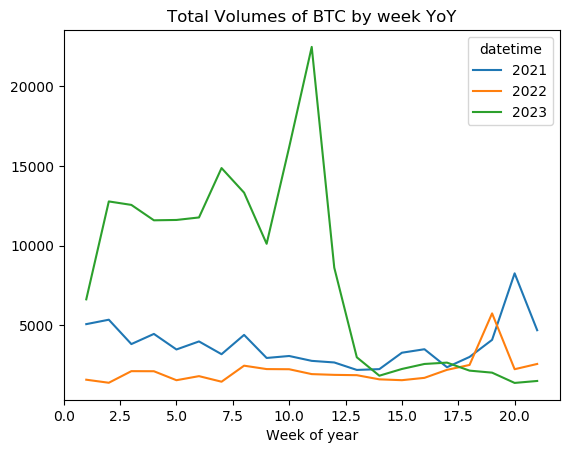

In [65]:
df_BTC_vol_1to6[df_BTC_vol_1to6.index <22].plot(title='Total Volumes of BTC by week YoY', xlabel='Week of year')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


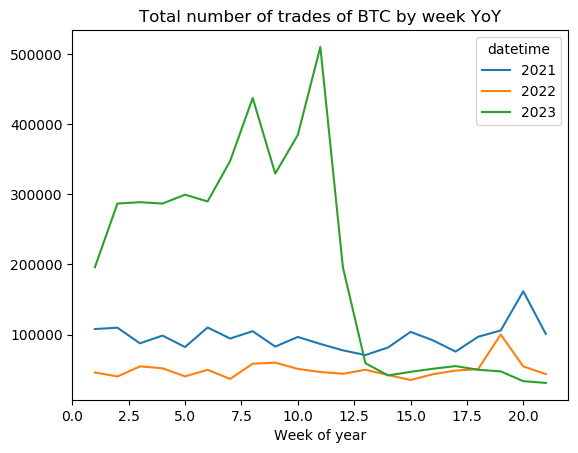

In [64]:
df_BTC_trade = pd.pivot_table(df_BTC, index=df_BTC.datetime.dt.week, columns=df_BTC.datetime.dt.year,
                    values='num_trades', aggfunc='mean')

df_BTC_trade[df_BTC_trade.index <22].plot(title='Total number of trades of BTC by week YoY', xlabel='Week of year')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


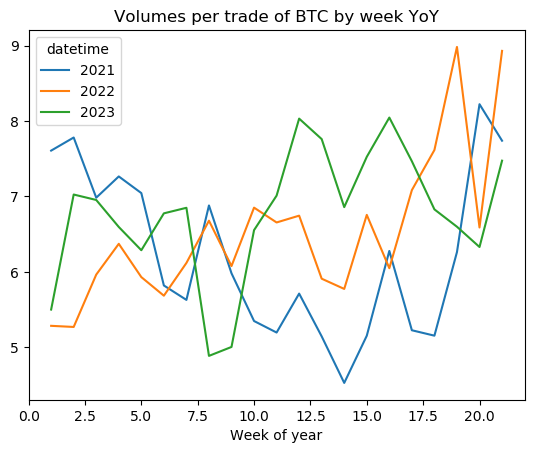

In [62]:
#Volume to Trade Ratio

df_BTC['VolperTrade'] = df_BTC['volume']/df_BTC['num_trades']


df_volpertrade = pd.pivot_table(df_BTC, index=df_BTC.datetime.dt.week, columns=df_BTC.datetime.dt.year,
                    values='VolperTrade', aggfunc='sum')

df_volpertrade[df_volpertrade.index <22].plot(title='Volumes per trade of BTC by week YoY', xlabel='Week of year')
plt.show()



#2023 observing a decline in the purchasing behaviour as the months progress

In [63]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week,change_open,VolperTrade
0,"01/01/2021, 00:00:00","01/01/2021, 00:59:59",28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389,1215.359238,...,1609462799999,BTC,USDT,2021-01-01 00:00:00,2021,1,1,4,NaN,0.039593
1,"01/01/2021, 01:00:00","01/01/2021, 01:59:59",28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896,3160.041701,...,1609466399999,BTC,USDT,2021-01-01 01:00:00,2021,1,1,4,71.50,0.052005
2,"01/01/2021, 02:00:00","01/01/2021, 02:59:59",29410.00,29465.26,29120.03,29194.65,2384.231560,6.984265e+07,57646,1203.433506,...,1609469999999,BTC,USDT,2021-01-01 02:00:00,2021,1,1,4,414.87,0.041360
3,"01/01/2021, 03:00:00","01/01/2021, 03:59:59",29195.25,29367.00,29150.02,29278.40,1461.345077,4.276078e+07,42510,775.915666,...,1609473599999,BTC,USDT,2021-01-01 03:00:00,2021,1,1,4,-214.75,0.034377
4,"01/01/2021, 04:00:00","01/01/2021, 04:59:59",29278.41,29395.00,29029.40,29220.31,2038.046803,5.961464e+07,55414,1003.342834,...,1609477199999,BTC,USDT,2021-01-01 04:00:00,2021,1,1,4,83.16,0.036779


In [29]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
change_open                            float64
VolperTrade  

### Load Twitter data

In [66]:
df_tweet = pd.read_csv('BTC_tweets_cleaned.csv')
df_tweet.head()

,year,month,day,day_of_week,text,timestamp,sentiment
0,2023,6,1,3,555 unique drawn mutant primapes soon on netw...,2023-06-01T00:00:00Z,NEUTRAL
1,2023,6,1,3,bitcoin mining your path to digital fortune jo...,2023-06-01T00:00:00Z,NEUTRAL
2,2023,6,1,3,2 takip imize toplamda 1000 tl hediye ediyoru...,2023-06-01T00:00:00Z,NaN
3,2023,6,1,3,tether planeja minerar bitcoin no uruguaifique...,2023-06-01T00:00:00Z,NEUTRAL
4,2023,6,1,3,face screaming in fear hyped wl giveaway high...,2023-06-01T00:00:00Z,POSITIVE


In [67]:
df_tweet_senti = pd.get_dummies(df_tweet.sentiment, prefix='Sentiment')
# df_tweet_senti.shape
df_tweet = df_tweet.join(df_tweet_senti)
df_tweet.shape


(1576, 11)

In [68]:
df_tweet_agg = df_tweet.groupby(['year','month','day']).agg({'Sentiment_NEGATIVE':'sum','Sentiment_NEUTRAL':'sum',
                                                            'Sentiment_POSITIVE':'sum'}).reset_index()

df_tweet_agg.head(2)

,year,month,day,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,2023,6,1,8,139,11
1,2023,6,2,4,144,11


In [69]:
df_tweet_agg.shape

(7, 6)

In [70]:
df_BTC.shape

(21274, 22)

In [71]:
df_joined = pd.merge(df_BTC, df_tweet_agg, how='left', on=['year','month','day'])

df_joined.shape

(21274, 25)

In [72]:
df_joined.head(2)

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,datetime,year,month,day,day_of_week,change_open,VolperTrade,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,"01/01/2021, 00:00:00","01/01/2021, 00:59:59",28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389,1215.359238,...,2021-01-01 00:00:00,2021,1,1,4,NaN,0.039593,NaN,NaN,NaN
1,"01/01/2021, 01:00:00","01/01/2021, 01:59:59",28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896,3160.041701,...,2021-01-01 01:00:00,2021,1,1,4,71.5,0.052005,NaN,NaN,NaN


In [73]:
#filter for the days twitter data is avialable
df_filter = df_joined[df_joined['datetime'] >= datetime.datetime(2023, 6, 1)] #TODO rewrite

In [74]:
df_filter.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
change_open                            float64
VolperTrade  

In [75]:
#Aggregating the dataframe by day to find out any correlation between the tweets and the prices 

df_daily = df_filter.groupby(['day','month','year','day_of_week']).agg({'open_time':'min',
                                                                         'close_time':'max',
                                                                         'open':'first',
                                                                         'high':'max',
                                                                         'low':'min',
                                                                         'close':'last',
                                                                         'volume':'sum',
                                                                         'num_trades':'sum',
                                                                         'open_timestamp':'min',
                                                                         'close_timestamp':'max',
                                                                         'Sentiment_NEGATIVE':'mean',
                                                                         'Sentiment_NEUTRAL':'mean',
                                                                         'Sentiment_POSITIVE':'mean'}).reset_index()


df_daily['VolperTrade'] = df_daily['volume']/df_daily['num_trades']
df_daily.head()


,day,month,year,day_of_week,open_time,close_time,open,high,low,close,volume,num_trades,open_timestamp,close_timestamp,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade
0,1,6,2023,3,"06/01/2023, 00:00:00","06/01/2023, 23:59:59",27210.36,27350.00,26605.05,26817.93,39217.80880,814389,1685577600000,1685663999999,8.0,139.0,11.0,0.048156
1,2,6,2023,4,"06/02/2023, 00:00:00","06/02/2023, 23:59:59",26817.93,27300.00,26505.00,27242.59,36380.90269,811087,1685664000000,1685750399999,4.0,144.0,11.0,0.044855
2,3,6,2023,5,"06/03/2023, 00:00:00","06/03/2023, 23:59:59",27242.59,27333.29,26914.93,27069.22,16595.34117,466520,1685750400000,1685836799999,21.0,139.0,22.0,0.035573
3,4,6,2023,6,"06/04/2023, 00:00:00","06/04/2023, 23:59:59",27069.22,27455.02,26951.00,27115.21,19258.41049,504474,1685836800000,1685923199999,25.0,156.0,27.0,0.038175
4,5,6,2023,0,"06/05/2023, 00:00:00","06/05/2023, 23:59:59",27115.20,27129.33,25388.00,25728.20,65805.60305,1420829,1685923200000,1686009599999,8.0,180.0,27.0,0.046315


In [76]:
df_daily.columns

Index(['day', 'month', 'year', 'day_of_week', 'open_time', 'close_time',
       'open', 'high', 'low', 'close', 'volume', 'num_trades',
       'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
       'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade'],
      dtype='object')

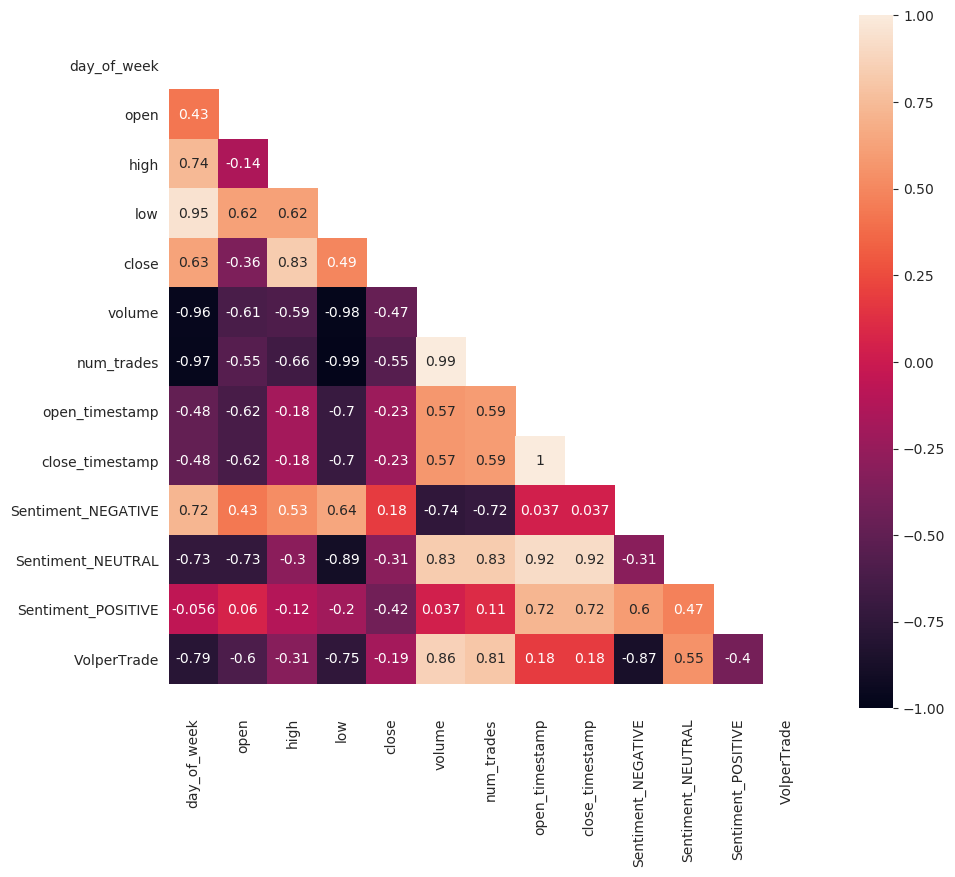

In [77]:
corr = df_daily[['day_of_week', 'open_time', 'close_time',
               'open', 'high', 'low', 'close', 'volume', 'num_trades',
               'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
               'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sn.heatmap(corr, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()